# Globular Cluster NGC6397 Color-Magnitude Diagram

Figure 12.8 from Chapter 12 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University
Press.

Plot the color-magnitude diagram of the central regions of the globular cluster NGC 6397, and overlay a
quadrilateral enclosing the blue stragglers. 

Data are from the Hubble Space Telescope, Padova Globular Cluster Photometry, [Piotto et al. 2002 A&A, 391, 945](http://adsabs.harvard.edu/abs/2002A%26A...391..945P).

Data files are calibrated photometry from the [PGCP website](http://groups.dfa.unipd.it/ESPG/hstphot.html), also
available on the [VizieR database](http://vizier.cfa.harvard.edu/viz-bin/VizieR?-source=J/A+A/391/945).

In [1]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig12_8.png' 

# graphic aspect ratio = width/height

aspect = 1.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

### HST Photometry of NGC6397

ASCII format table, relevant columns are F555W and color.  For clarity we will plot these without error bars.

In [3]:
photFile = 'ngc6397phot.txt'

data = pd.read_csv(photFile,sep=r'\s+',comment='#')
mag = np.array(data['F555W'])
color = np.array(data['Color'])

# range of colors and magnitudes to plot

cMin = -0.3 # blue limit
cMax = 2.0  # red limit

mMin = 23.5 # faint limit
mMax = 10.5 # bright limit

### Figure 12.8b

Plot the color-magnitude diagram as observed Color (F439W-F555W) vs. observed apparent brightness (F555W) in HST magnitudes.  Square aspect ratio.

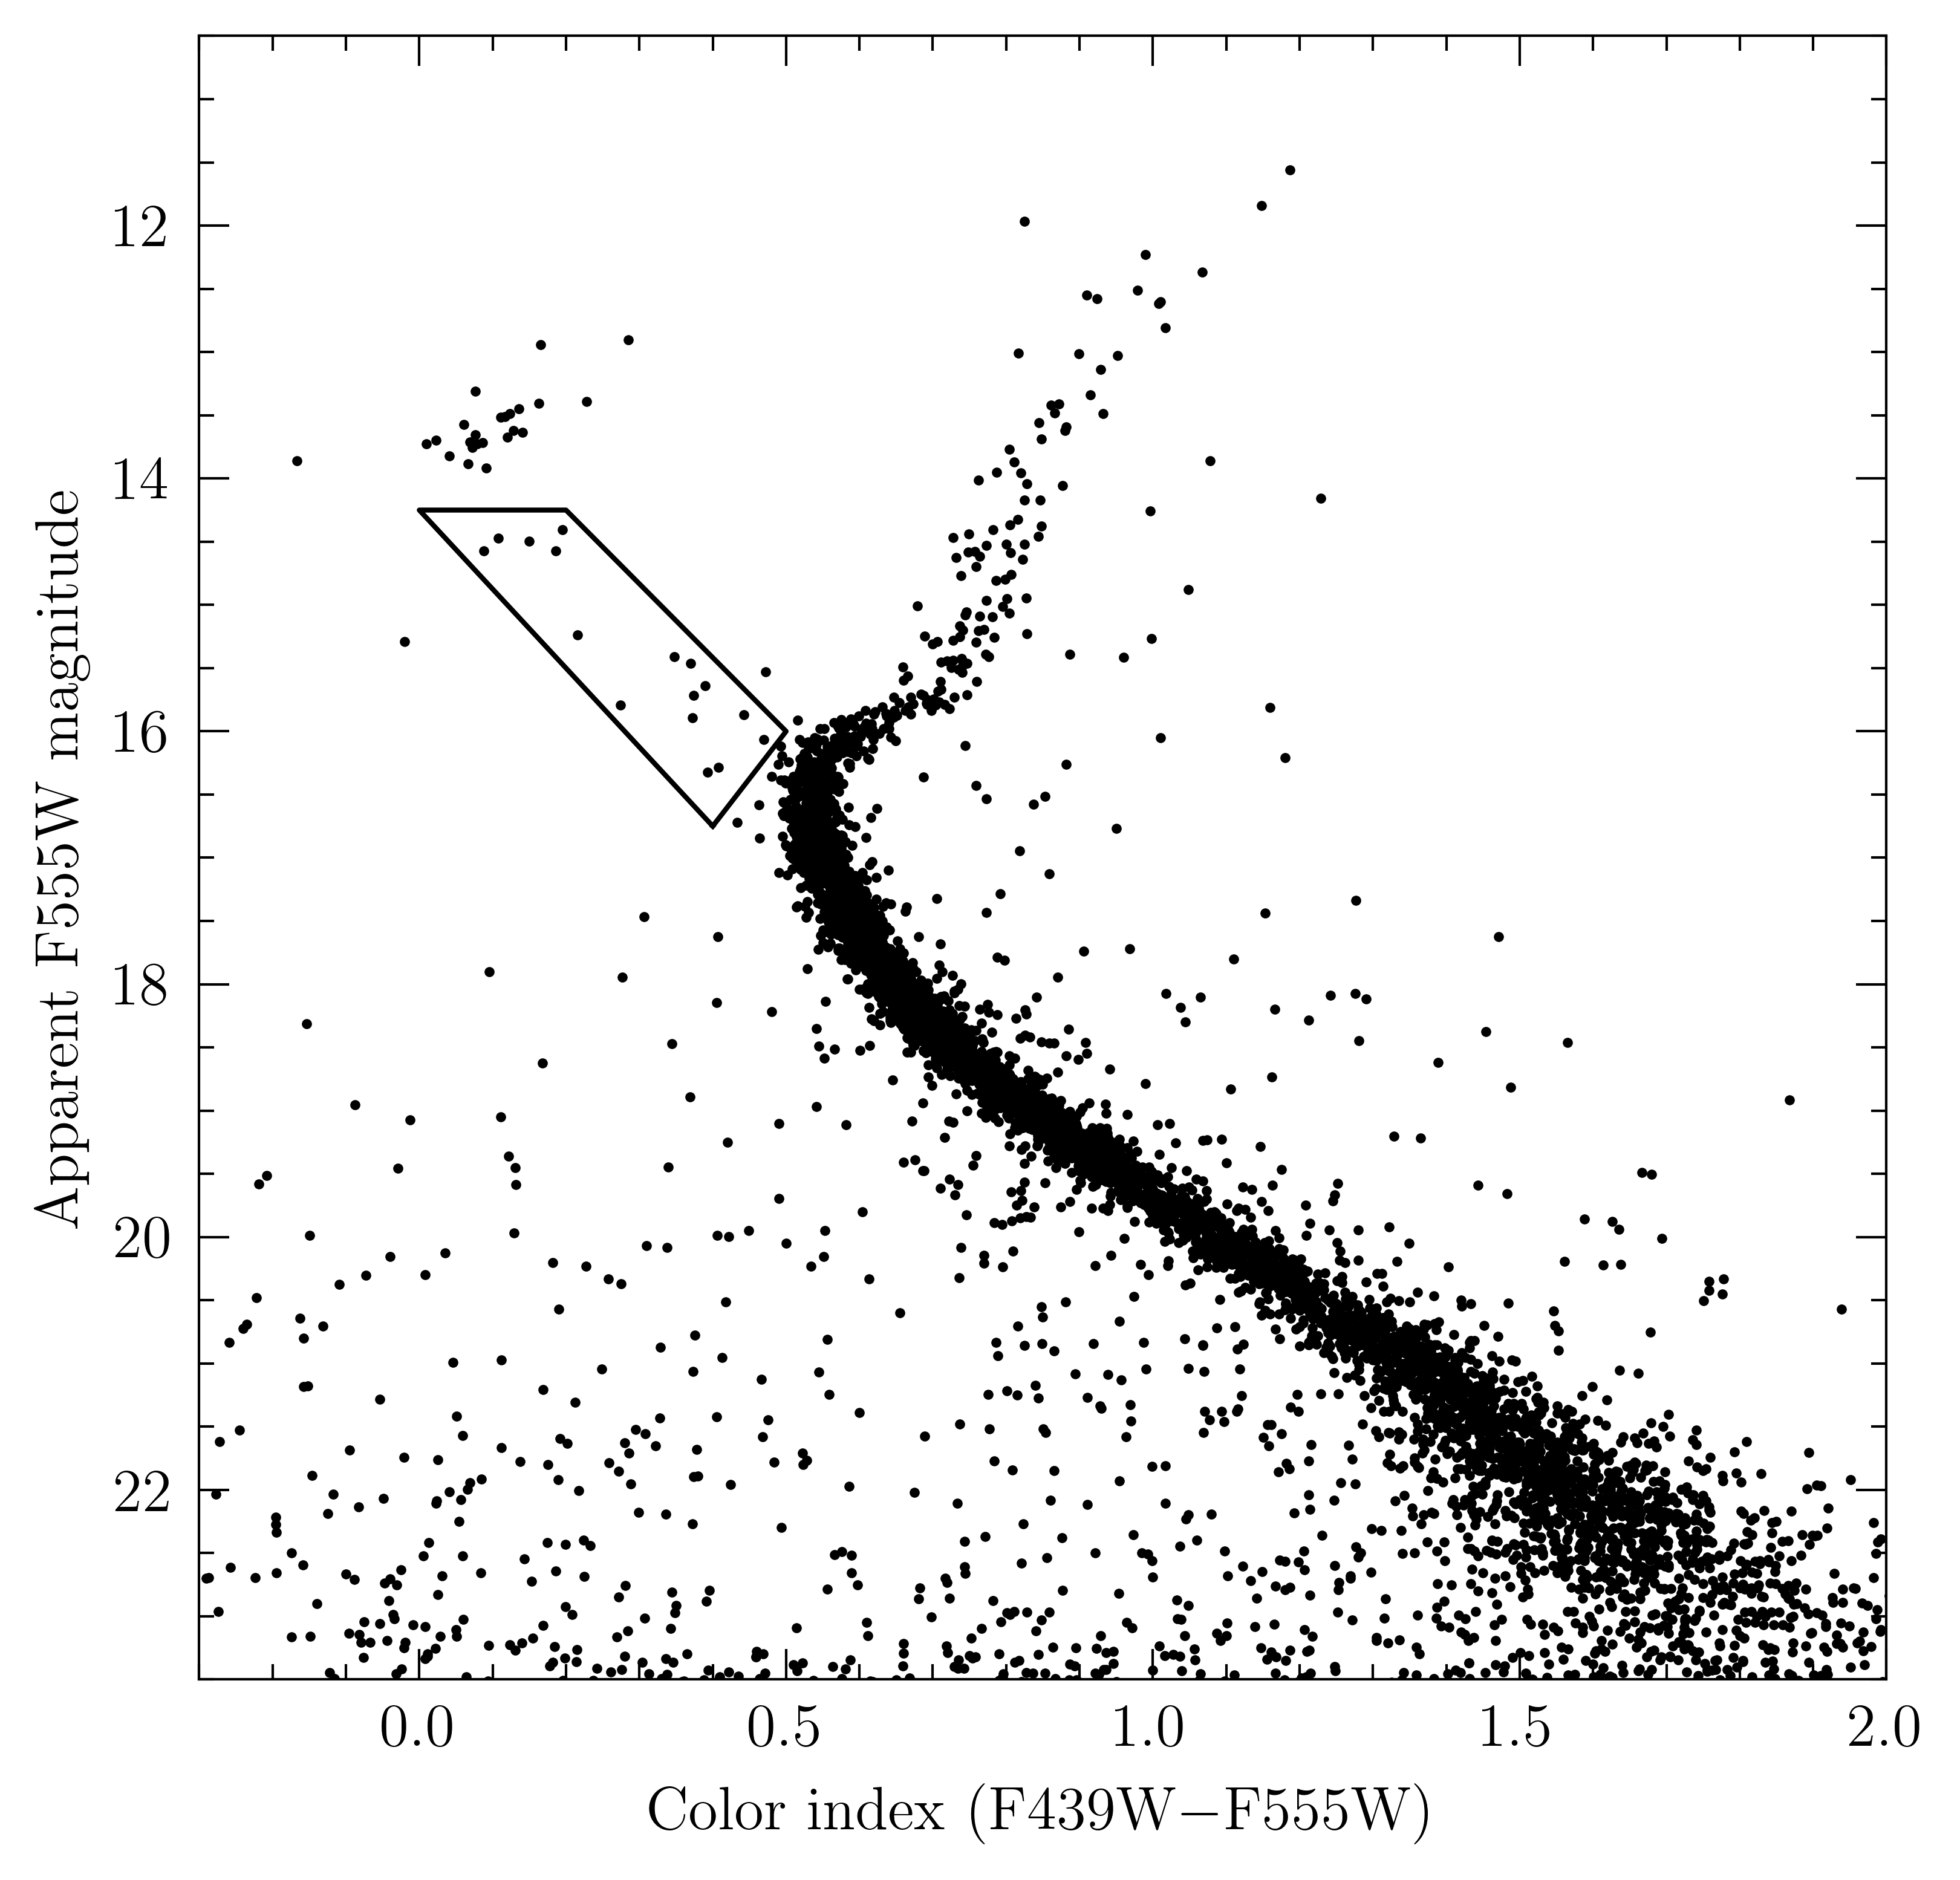

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top=True,right=True)
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top=True,right=True)

# do it

ax.set_xlim(cMin,cMax)
ax.set_xlabel(r'Color index (F439W$-$F555W)',fontsize=axisFontSize)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_ylim(mMin,mMax)
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylabel(r'Apparent F555W magnitude',fontsize=axisFontSize)

# Plot as dots

ax.plot(color,mag,'o',color='black',markersize=2,markeredgewidth=0,zorder=8)

colBS = [0.4 ,0.0  ,0.2  ,0.5 ,0.4]
magBS = [16.75,14.25,14.25,16.0,16.75]
ax.plot(colBS,magBS,'-',color='black',lw=1,zorder=8)

# make the PNG file

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')